In [1]:
import sys
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

## Loading MNIST data set

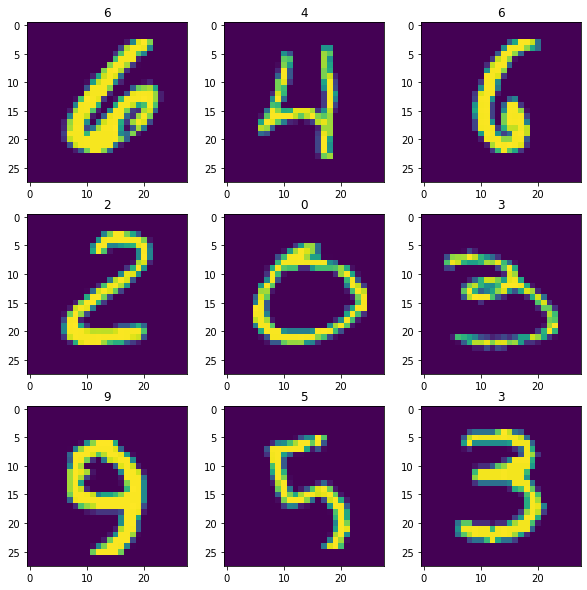

In [2]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

plt.figure(figsize=(10,10))
indexes = np.random.randint(0, len(xTrain), 9)
for i in range(len(indexes)):
    plt.subplot(3,3,i+1)
    plt.imshow(xTrain[indexes[i]])
    plt.title(yTrain[indexes[i]])
plt.show()

# Building the model

In [3]:

numClasses = 10

inputs = layers.Input((28,28,1))
x = layers.Conv2D(6, 5, activation="relu")(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(16, 5, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation="relu")(x)
x = layers.Dense(84, activation="relu")(x)
outputs = layers.Dense(numClasses)(x)
leNet5 = keras.Model(inputs=inputs, outputs=outputs)
leNet5.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = optimizers.Adam(),
    metrics = ["accuracy"]
)
leNet5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840 

In [4]:
history = leNet5.fit(xTrain, yTrain, validation_data=(xTest,yTest), batch_size=64, epochs=10)
leNet5.evaluate(xTest, yTest)

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 1.1559 - accuracy: 0.7988 - val_loss: 0.1056 - val_accuracy: 0.9681
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0982 - accuracy: 0.9690 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0595 - accuracy: 0.9809 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0723 - val_accuracy: 0.9770
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0594 - val_accuracy: 0.9825
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0532 - val_accuracy: 0.9850
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0813 - val_accuracy: 0.977

[0.07292196899652481, 0.9835000038146973]

Accuracy Score: 0.9835


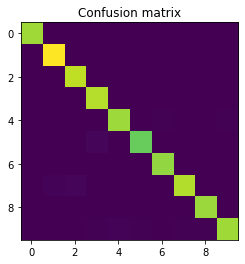

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

yPred = leNet5.predict(xTest)
yPred = np.argmax(yPred, axis=-1)

conf = confusion_matrix(yTest, yPred, normalize=None)
accuracy = accuracy_score(yPred, yTest)
print("Accuracy Score:", accuracy)
plt.imshow(conf)
plt.title("Confusion matrix")
plt.show()

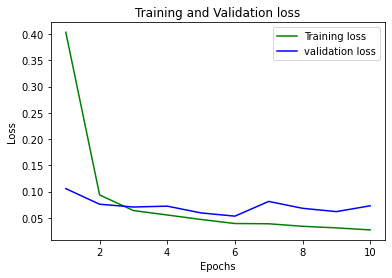

In [8]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()